This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [1]:
from __future__ import division
from plot_utils import *
import numpy as np
import os
import pylab
import seaborn

In [2]:
# Step 1 load data
nb_runs = 5
model_full_names = ["Random Policy", "Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_filenames = ["random","fmb","rmb","new_amb"]
#model_filenames = ["random","dist_fmb","dist_rmb","dist_amb"]

saves = {}
stats = {}
for k in model_filenames:
    saves[k] = []
    stats[k] = {}
    
for filename in model_filenames:
    for j in range(nb_runs):
        full_filename = "run_saves/"+filename+"_"+str(j)+"_bk.pickle"
        if os.path.isfile(full_filename):
            data = pickle.load(open(full_filename,"rb"))
            print 'final_eval_errors_bread_cart' in data
            saves[filename].append(data)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Random Policy


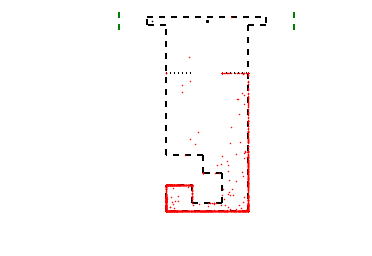

Flat Random Goal Babbling


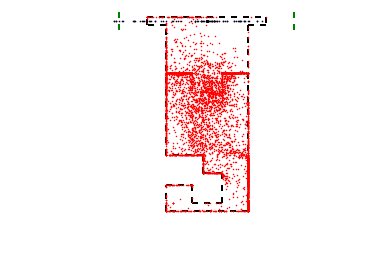

Random Model Babbling


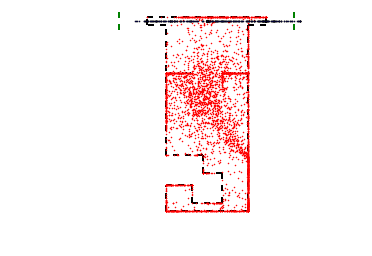

Active Model Babbling


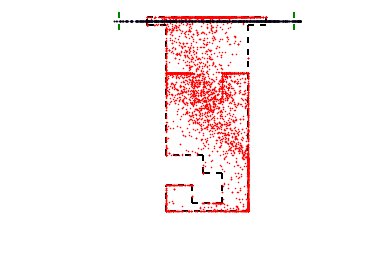

In [3]:
# Visualization of cart and agent final pos reached on 1 run
for m_name, m_id in zip(model_full_names,model_filenames):
    b_k = saves[m_id][0]
    print m_name
    #for i in range(nb_runs):
    #b_k = saves[m_id][i]
    plot_agent_pos_exploration(1, b_k['final_agent_x_reached'],
                                   b_k['final_agent_z_reached'],
                                   b_k['final_cart_x_reached'])
    if m_id == 'new_fmb':
        print 'zzz'
        #plt.savefig("cov_"+m_name+".pdf", bbox_inches='tight')
    plt.show()
    
    

In [4]:
nb_a_cells_x = 10
nb_a_cells_z = 30
nb_a_cells = nb_a_cells_x * nb_a_cells_z
nb_c_cells = 80
nb_b_cells = 32

# Grid cell visualization
for m_id in model_filenames:
    stats[m_id]['agent_cells'] = []
    stats[m_id]['cart_cells'] = []
    stats[m_id]['b_combinations'] = []
    stats[m_id]['first_breads'] = []
    stats[m_id]['first_swing_left'] = []
    stats[m_id]['first_swing_right'] = []
    stats[m_id]['first_cart_touched'] = []
    stats[m_id]['agent_error'] = []
    stats[m_id]['cart_error'] = []
    stats[m_id]['large_cart_error'] = []
    stats[m_id]['large_bread_error'] = []
    stats[m_id]['bread_error'] = []
    stats[m_id]['eval_cart_touched'] = []
    stats[m_id]['chosen_modules'] = []
def mean_std(data_name):
    mean = round(np.mean(stats[m_id][data_name]),3)
    std = round(np.std(stats[m_id][data_name]),3)
    return mean,std

for m_name, m_id in zip(model_full_names,model_filenames):
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explored_bins, c_explored_bins, b_explored_bins, first_swing_left, first_swing_right, first_breads_found,\
        first_cart_touched = get_grid_cell_exploration(b_k['final_agent_x_reached'],
                              b_k['final_agent_z_reached'],
                              b_k['final_cart_x_reached'],
                              b_k['final_bread_recovered'],
                              [b_k['bread_0'],b_k['bread_1'],b_k['bread_2'],b_k['bread_3'],b_k['bread_4']],
                              c_bins=nb_c_cells,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
        stats[m_id]['agent_cells'].append((a_explored_bins/nb_a_cells)*100)
        stats[m_id]['cart_cells'].append((c_explored_bins/nb_c_cells)*100)
        stats[m_id]['b_combinations'].append((b_explored_bins/nb_b_cells)*100)
        stats[m_id]['first_breads'].append(first_breads_found) 
        stats[m_id]['first_swing_left'].append(first_swing_left) 
        stats[m_id]['first_swing_right'].append(first_swing_right)
        stats[m_id]['first_cart_touched'].append(first_cart_touched)
        
        a_err, c_err, b_err, cart_touched_eval = get_final_eval_error(b_k['final_eval_errors'],
                                                                      b_k['final_eval_cart_touched'],
                                                                      info=False)
        _, long_c_err, long_b_err = b_k['final_eval_errors_bread_cart']
        stats[m_id]['agent_error'].append(round(a_err,4))
        stats[m_id]['cart_error'].append(round(c_err,4))
        stats[m_id]['bread_error'].append(round(b_err,4))
        stats[m_id]['large_cart_error'].append(round(long_c_err,4))
        stats[m_id]['large_bread_error'].append(round(long_b_err,4))
        stats[m_id]['eval_cart_touched'].append(cart_touched_eval)
print '--- EXPLORATION ---'
exploration_metrics = ['agent_cells', 'cart_cells', 'b_combinations',
                       'first_cart_touched', 'first_swing_left', 'first_swing_right']

for m_name, m_id in zip(model_full_names,model_filenames):
    print "#################### " + m_name + " ##################"
    
    for i in range(nb_runs):
        
        b_k = saves[m_id][i]
        a = np.array(b_k['choosen_modules'])
        unique, counts = np.unique(a, return_counts=True)
        #print dict(zip(unique, counts))
    
    for metric in exploration_metrics:
        values = stats[m_id][metric]
        if not 'first' in metric:
            mean,std = mean_std(metric)
            print metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std)
        else:
            print metric + ':' + '%s' % (values)

    for i in range(6):
        first_found = []
        nb_found = []
        for j in range(nb_runs):
            first_found.append(stats[m_id]['first_breads'][j][i][0])
            nb_found.append(stats[m_id]['first_breads'][j][i][1])
        print 'bread %s:' % i
        print "first found: %s" % first_found
        print "nb_found: %s" % nb_found
    
    
print '--- EXPLOITATION ---'
exploitation_metrics = ['agent_error', 'cart_error', 'large_cart_error', 'bread_error', 'large_bread_error', 'eval_cart_touched']
for m_name, m_id in zip(model_full_names,model_filenames):
    print "#################### " + m_name + " ##################"
    for metric in exploitation_metrics:
        values = stats[m_id][metric]
        mean,std = mean_std(metric)
        print metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std)    


--- EXPLORATION ---
#################### Random Policy ##################
agent_cells:[13.333333333333334, 14.666666666666666, 15.0, 15.666666666666668, 15.0], MEAN: 14.733, STD: 0.772
cart_cells:[2.5, 2.5, 2.5, 1.25, 2.5], MEAN: 2.25, STD: 0.5
b_combinations:[25.0, 31.25, 21.875, 21.875, 21.875], MEAN: 24.375, STD: 3.644
first_cart_touched:[3917, 9765, 9610, 'never', 6997]
first_swing_left:['never', 'never', 'never', 'never', 'never']
first_swing_right:['never', 'never', 'never', 'never', 'never']
bread 0:
first found: [0, 0, 0, 0, 0]
nb_found: [9667, 9691, 9696, 9661, 9673]
bread 1:
first found: [72, 2, 37, 40, 85]
nb_found: [162, 163, 156, 175, 174]
bread 2:
first found: [104, 96, 76, 37, 68]
nb_found: [170, 143, 146, 163, 152]
bread 3:
first found: [2486, 4924, 6550, 5601, 2428]
nb_found: [1, 3, 1, 1, 1]
bread 4:
first found: ['never', 'never', 9610, 'never', 'never']
nb_found: [0, 0, 1, 0, 0]
bread 5:
first found: ['never', 'never', 'never', 'never', 'never']
nb_found: [0, 0, 0, 0

In [5]:
# Grid cell exploration curves
all_a_explo = np.zeros((4,nb_runs,101))
all_c_explo = np.zeros((4,nb_runs,101))
all_b_explo = np.zeros((4,nb_runs,101))
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    print m_name
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explo = [0.]
        c_explo = [0.]
        b_explo = [0.]
        for nb_episodes in np.arange(100,10100,100):
            
            a_explored_bins, c_explored_bins, b_explored_bins, _, _, _,_\
            = get_grid_cell_exploration(b_k['final_agent_x_reached'][:nb_episodes],
                                  b_k['final_agent_z_reached'][:nb_episodes],
                                  b_k['final_cart_x_reached'][:nb_episodes],
                                  b_k['final_bread_recovered'][:nb_episodes],
                                  [b_k['bread_0'][:nb_episodes],
                                   b_k['bread_1'][:nb_episodes],
                                   b_k['bread_2'][:nb_episodes],
                                   b_k['bread_3'][:nb_episodes],
                                   b_k['bread_4'][:nb_episodes]],
                                  c_bins=80,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
            a_explo.append((a_explored_bins/nb_a_cells)*100)
            c_explo.append((c_explored_bins/nb_c_cells)*100)
            b_explo.append((b_explored_bins/nb_b_cells)*100)
        all_a_explo[m_nb,i,:] = a_explo
        all_c_explo[m_nb,i,:] = c_explo
        all_b_explo[m_nb,i,:] = b_explo
        
#print np.sum(all_a_explo,axis=1).shape
#print np.mean(np.sum(all_a_explo,axis=1),axis=0).shape
#break
colors = ['red','blue','green','magenta','black','cyan','orange']
mean_a_explo = np.mean(all_a_explo,axis=1)
mean_b_explo = np.mean(all_b_explo,axis=1)
mean_c_explo = np.mean(all_c_explo,axis=1)

std_a_explo = np.std(all_a_explo,axis=1)
std_b_explo = np.std(all_b_explo,axis=1)
std_c_explo = np.std(all_c_explo,axis=1)

Random Policy
Flat Random Goal Babbling
Random Model Babbling
Active Model Babbling


agent exploration
0.7717224601860151
0.3887301263230216
0.3887301263230216
0.6324555320336763


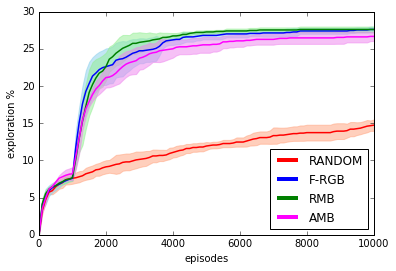

cart
0.5
12.539936203984453
4.138236339311712
7.271519786124493


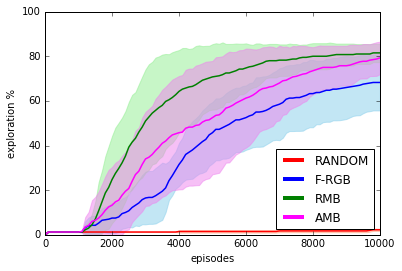

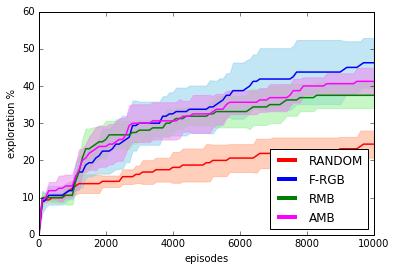

In [6]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RANDOM','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print "agent exploration"
x = np.arange(0,10100,100)
for i in range(4):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,30)
plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print "cart"
for i in range(4):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

#print "bread"
for i in range(4):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,60)
plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

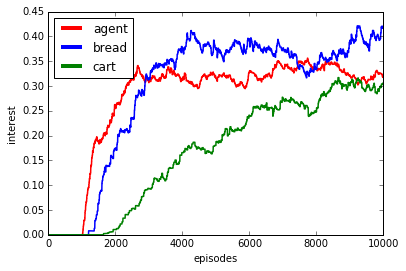

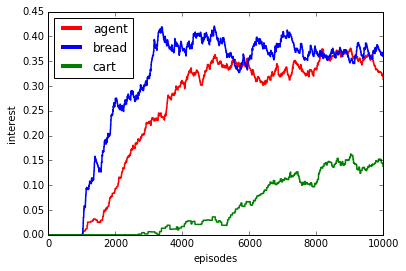

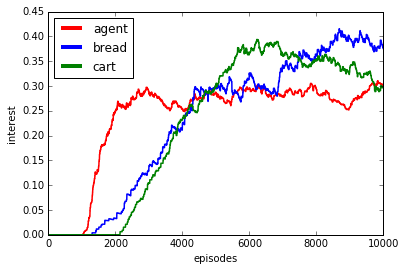

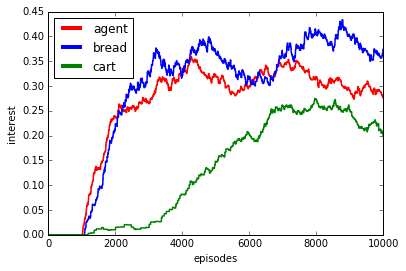

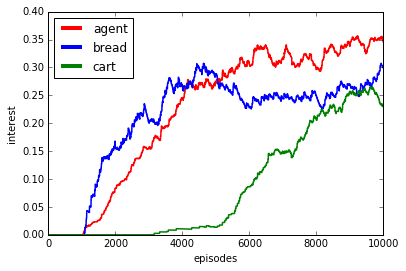

In [7]:
short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:
for i in range(nb_runs):
    ints = saves[model_filenames[3]][i]['interests']
    plot_interests(i, ints,legend=True,labels=short_labels)
    plt.savefig("d_legends_interests_"+str(i)+".pdf", bbox_inches='tight')


3


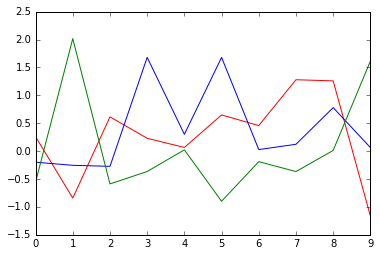

In [10]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

labels = ['agent final position','bread final count','cart final position',
               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print len(labels_2)
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 7:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4],
                    range(10),pylab.randn(10),colors[5],
                    range(10),pylab.randn(10),colors[6])
    
leg = figlegend.legend(lines, labels[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.pdf')

In [9]:
print len()




100


array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,  1800,
        1900,  2000,  2100,  2200,  2300,  2400,  2500,  2600,  2700,
        2800,  2900,  3000,  3100,  3200,  3300,  3400,  3500,  3600,
        3700,  3800,  3900,  4000,  4100,  4200,  4300,  4400,  4500,
        4600,  4700,  4800,  4900,  5000,  5100,  5200,  5300,  5400,
        5500,  5600,  5700,  5800,  5900,  6000,  6100,  6200,  6300,
        6400,  6500,  6600,  6700,  6800,  6900,  7000,  7100,  7200,
        7300,  7400,  7500,  7600,  7700,  7800,  7900,  8000,  8100,
        8200,  8300,  8400,  8500,  8600,  8700,  8800,  8900,  9000,
        9100,  9200,  9300,  9400,  9500,  9600,  9700,  9800,  9900,
       10000])